In this exercise, you will use the Portuguese sea battles data Links to an external site. that contains outcomes of naval battles between Portuguese and Dutch/British ships between 1583 and 1663.

| Features | Features Explained |
| -- | -- |
| Battle |	Year of the battle|
| Year |	Number of Portuguese ships |
| Portuguese ships |	Name of the battle place |
| Dutch ships |	Number of Dutch ships|
| English ships |	Number of ships from English side |
| The ratio of Portuguese to Dutch/British ships |	 |
| Spanish Involvement |	1=Yes, 0=No |
| Portuguese outcome |	-1=Defeat, 0=Draw, 1=Victory|

1) Use an SVM-based model to predict the Portuguese outcome of the battle from the number of ships involved on all sides and Spanish involvement.

In [2215]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,accuracy_score, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [2216]:
frame = pd.read_csv( '~/UW/IMT_574/Week8/Homework/armada.dat.csv', header=None, names=['Battle', 'Year', 'Portuguese_Ships', 'Dutch_Ships', 'English_Ships', 
                                                                                'Portuguese_to_Dutch_British_Ships_Ratio', 'Spanish_Involvement', 'Portuguese_Outcome'])
frame.head()

,Battle,Year,Portuguese_Ships,Dutch_Ships,English_Ships,Portuguese_to_Dutch_British_Ships_Ratio,Spanish_Involvement,Portuguese_Outcome
0,Bantam,1601,6,3,0,2.000,0,0
1,Malacca Strait,1606,14,11,0,1.273,0,0
2,Ilha das Naus,1606,6,9,0,0.667,0,-1
3,Pulo Butum,1606,7,9,0,0.778,0,1
4,Surrat,1615,6,0,4,1.500,0,0


In [2217]:
#Encoding the categorical variable Battle into integers
Encoder = LabelEncoder()
frame['Battle_Id'] = Encoder.fit_transform(frame['Battle'])
frame.head()

,Battle,Year,Portuguese_Ships,Dutch_Ships,English_Ships,Portuguese_to_Dutch_British_Ships_Ratio,Spanish_Involvement,Portuguese_Outcome,Battle_Id
0,Bantam,1601,6,3,0,2.000,0,0,2
1,Malacca Strait,1606,14,11,0,1.273,0,0,11
2,Ilha das Naus,1606,6,9,0,0.667,0,-1,7
3,Pulo Butum,1606,7,9,0,0.778,0,1,14
4,Surrat,1615,6,0,4,1.500,0,0,16


In [2218]:
#Checking for NaNs
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Battle                                   28 non-null     object 
 1   Year                                     28 non-null     int64  
 2   Portuguese_Ships                         28 non-null     int64  
 3   Dutch_Ships                              28 non-null     int64  
 4   English_Ships                            28 non-null     int64  
 5   Portuguese_to_Dutch_British_Ships_Ratio  28 non-null     float64
 6   Spanish_Involvement                      28 non-null     int64  
 7   Portuguese_Outcome                       28 non-null     int64  
 8   Battle_Id                                28 non-null     int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 2.1+ KB


In [2219]:
#Splitting dataset in training and testing
#X = frame.iloc[:, ~frame.columns.isin(['Battle', 'Portuguese_Outcome'])]
# X  = frame[['Portuguese_Ships', 'Dutch_Ships']]
X  = frame[['Portuguese_Ships', 'Dutch_Ships', 'English_Ships', 'Spanish_Involvement']]
y = frame['Portuguese_Outcome']

X_train,X_test,y_train,y_test = train_test_split(X, y,random_state=60,test_size=0.3)

In [2220]:
#Normalizing dataset for better processing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [2221]:
model_svm = svm.SVC(kernel='linear')
model_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [2222]:
# Predict using the SVM model
y_predicted = model_svm.predict(X_test)

In [2223]:
# Evaluate the predictions
accuracy = accuracy_score(y_test, y_predicted)
print("Accuracy of the model using the SVM Classifier:", accuracy * 100)

Accuracy of the model using the SVM Classifier: 77.77777777777779


In [2224]:
# w = model_svm.coef_[0]
# print(w)

# a = -w[0] / w[1]

# xx = np.linspace(0,12)
# yy = a * xx - model_svm.intercept_[0] / w[1]

# h0 = plt.plot(xx, yy, 'k-', label="non weighted div")

# plt.scatter(X[:, 0], X[:, 1], c = y)
# plt.legend()
# plt.show()

In [2225]:
from sklearn.inspection import DecisionBoundaryDisplay

def plot_training_data_with_decision_boundary(
    kernel, ax=None, long_title=True, support_vectors=True
): 
# Settings for plotting
    if ax is None:
        _, ax = plt.subplots(figsize=(4, 3))
    x_min, x_max, y_min, y_max = -3, 3, -3, 3
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    common_params = {"estimator": model_svm, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    if support_vectors:
        # Plot bigger circles around samples that serve as support vectors
        ax.scatter(
            model_svm.support_vectors_[:, 0],
            model_svm.support_vectors_[:, 1],
            s=150,
            facecolors="none",
            edgecolors="k",
        )

    # Plot samples by color and add legend
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors="k")
    ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    if long_title:
        ax.set_title(f" Decision boundaries of {kernel} kernel in SVC")
    else:
        ax.set_title(kernel)

    if ax is None:
        plt.show()

In [2226]:
#plot_training_data_with_decision_boundary("poly")

----

2)  Try solving the same problem using two other classifiers that you know.

**Using Multinomial Logistic Regression Classifier:**

In [2227]:
#Splitting dataset in training and testing
X  = frame[['Portuguese_Ships', 'Dutch_Ships', 'English_Ships', 'Spanish_Involvement']]
y = frame['Portuguese_Outcome']

X_train,X_test,y_train,y_test = train_test_split(X, y,random_state=60,test_size=0.3)

In [2228]:
#Create Logistic Regression model and fit the model
log_reg_model  = LogisticRegression()

log_reg_model.fit(X_train, y_train)

LogisticRegression()

In [2229]:
#Test the model
y_predicted = log_reg_model.predict(X_test)

In [2230]:
#Calculate accuracy
accuracy = accuracy_score(y_test, y_predicted)
print(f"Accuracy for the multinomial logistic regression model: {accuracy * 100} % ")

Accuracy for the multinomial logistic regression model: 66.66666666666666 % 


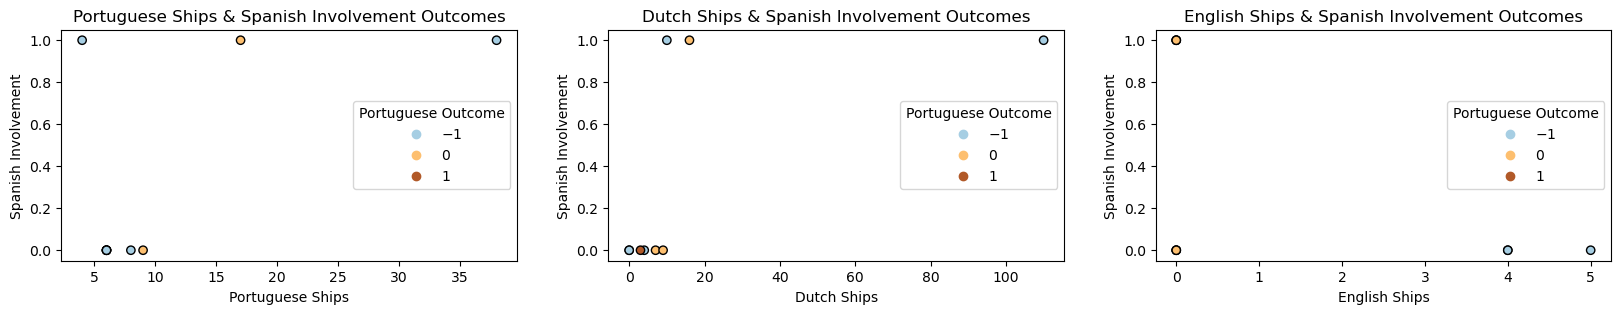

In [2231]:
plt.figure(1, figsize=(20, 3))

plt.subplot(1, 3, 1)  # row 1, column 2, count 1
plt.title('Portuguese Ships & Spanish Involvement Outcomes')
plt.scatter(X_test['Portuguese_Ships'], X_test['Spanish_Involvement'], c = y_predicted, edgecolors='k',
            cmap=plt.cm.Paired)
plt.xlabel('Portuguese Ships')
plt.ylabel('Spanish Involvement')
plt.legend(*scatter.legend_elements(), loc="center right", title="Portuguese Outcome")

plt.subplot(1, 3, 2)
plt.title('Dutch Ships & Spanish Involvement Outcomes')
plt.scatter(X_test['Dutch_Ships'], X_test['Spanish_Involvement'], c = y_predicted, edgecolors='k',
             cmap=plt.cm.Paired)
plt.xlabel('Dutch Ships')
plt.ylabel('Spanish Involvement')
plt.legend(*scatter.legend_elements(), loc="center right", title="Portuguese Outcome")

plt.subplot(1, 3, 3)
plt.title('English Ships & Spanish Involvement Outcomes')
plt.scatter(X_test['English_Ships'], X_test['Spanish_Involvement'], c = y_predicted, edgecolors='k',
             cmap=plt.cm.Paired)
plt.xlabel('English Ships')
plt.ylabel('Spanish Involvement')
plt.legend(*scatter.legend_elements(), loc="center right", title="Portuguese Outcome")

plt.show()

***Using Decision Trees Classifier:***

In [2232]:
#Declare and fit the model
model_decision_tree = DecisionTreeClassifier(max_depth=2)
model_decision_tree = model_decision_tree.fit(X_train, y_train)

In [2233]:
#Evaluate accuracy
accuracy_score = model_decision_tree.score(X_test, y_test)
print(f"Accuracy for the model using the Decision Trees Classifier: {accuracy_score * 100} % ")

Accuracy for the model using the Decision Trees Classifier: 22.22222222222222 % 


In [2234]:
#Test the classifier
y_pred = model_decision_tree.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# mae  = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# # print(legend)
# print(f"Mean Squared Error (MSE): {mse}")
# print(f"Mean Absolute Error (MAE): {mae}")
# print(f"R-squared (R2): {r2}")

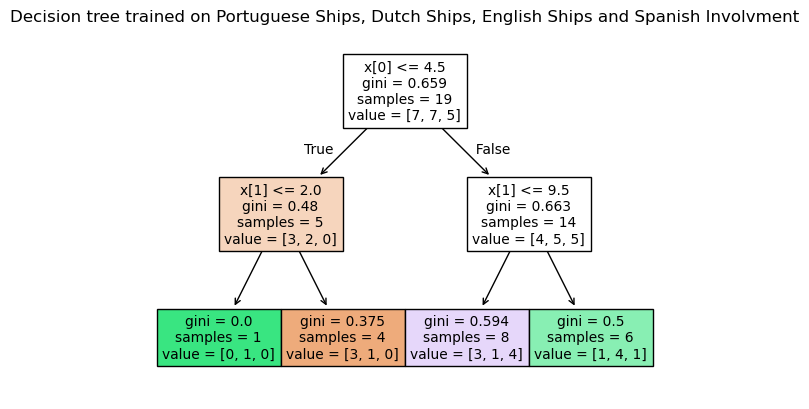

In [2235]:
#Plot Decission Tree
plt.figure()
plot_tree(model_decision_tree, filled=True)
plt.title('Decision tree trained on Portuguese Ships, Dutch Ships, English Ships and Spanish Involvment')
plt.show()

---

3) Report and compare their results with those from SVM.